data can be downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/autos/

This database contains car's market prices and different attributes. This includes normalized losses, which represents the average loss per year for insuring a specific car type.

first import the data and give appropriate column headings

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars=pd.read_csv('imports-85.data',delimiter=',',names=cols)

second clean data by replacing ? with Nan, removing Nan values and normalizing values

In [2]:
cars=cars.replace('?', np.nan)
cars['normalized-losses']=pd.to_numeric(cars['normalized-losses'])
cars_df=cars.dropna()


In [3]:
# convert columns that are not numeric to numeric before normalizing
pd.to_numeric(cars_df['horsepower'])
pd.to_numeric(cars['peak-rpm'])
pd.to_numeric(cars_df['price'])
pd.to_numeric(cars_df['bore'])
pd.to_numeric(cars_df['stroke'])

3      3.40
4      3.40
6      3.40
8      3.40
10     2.80
11     2.80
12     3.19
13     3.19
18     3.03
19     3.11
20     3.11
21     3.23
22     3.23
23     3.39
24     3.23
25     3.23
26     3.23
28     3.46
29     3.90
30     3.41
31     3.41
32     3.07
33     3.41
34     3.41
35     3.41
36     3.41
37     3.58
38     3.58
39     3.58
40     3.58
       ... 
170    3.50
171    3.50
172    3.50
173    3.54
174    3.35
175    3.54
176    3.54
177    3.54
178    3.35
179    3.35
180    3.35
182    3.40
183    3.40
184    3.40
185    3.40
186    3.40
187    3.40
188    3.40
190    3.40
194    3.15
195    3.15
196    3.15
197    3.15
198    3.15
199    3.15
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 159, dtype: float64

In [4]:
#normalize columns so that all values fall between 0 and 1
hold_rel=cars_df.select_dtypes(include=['number'])
hold_rel=hold_rel.astype(np.float64)
hold_obs=cars_df.select_dtypes(include=['object'])
hold_shape=hold_rel.shape
hold_test=hold_rel
for i in range(0,hold_shape[1]):
    min_hold=hold_rel.iloc[:,i].min()
    max_hold=hold_rel.iloc[:,i].max()
    dif_hold=max_hold-min_hold
    for f,v in enumerate (hold_rel.iloc[:,i]):
        hold_rel.iat[f,i]=(((v-min_hold)/dif_hold)) 
cars_new=pd.concat([hold_rel,hold_obs],axis=1)


Third, run different k nearest neighbor models predicting normalized losses.

Use root mean square error to asses different model's performance

In [5]:
# the first model uses every numeric column, except for 
# the target variable, as a predictor in seperate models.
# Each model's resulting rmse is stored in the rmse 
# variable wich is the function's output

def knn_train_test_simple(df,target_vars):
    hold_train_vars=df.select_dtypes(include=['number'])
    hold_train_vars_final=hold_train_vars.drop([target_vars],axis=1)
    nums_train=round(df.shape[0]*.75)
    train=df.iloc[0:nums_train]
    test=df.iloc[nums_train:df.shape[0]+1]
    rmse_all={}
    for column in hold_train_vars_final:
        knn=KNeighborsRegressor()
        knn.fit(train[[column]],train[[target_vars]])
        labels=knn.predict(test[[column]])
        mse=mean_squared_error(test[[target_vars]],labels)
        rmse=mse**(1/2)
        rmse_all[column]=rmse
    return rmse_all

In [6]:
test_simple=knn_train_test_simple(cars_new,'normalized-losses')
test_simple

{'city-mpg': 0.23637070670724428,
 'compression-rate': 0.20391638468684053,
 'curb-weight': 0.2818907680070063,
 'engine-size': 0.26310486785030646,
 'height': 0.25107602648471694,
 'highway-mpg': 0.21476373420090886,
 'length': 0.22945356947407242,
 'symboling': 0.18053028680025018,
 'wheel-base': 0.2526904108545398,
 'width': 0.2674501137302776}

In [7]:
# This model is the same as the previous, except that 
# the number of clusters is varied for each model 
from sklearn.neighbors import KNeighborsRegressor
def knn_train_test_k_params(df,target_vars):
    hyperparams=[x for x in range(1,10,2)]
    hold_train_vars=df.select_dtypes(include=['number'])
    hold_train_vars_final=hold_train_vars.drop([target_vars],axis=1)
    nums_train=round(df.shape[0]*.75)
    train=df.iloc[0:nums_train]
    test=df.iloc[nums_train:df.shape[0]+1]
    rmse_all={}
    hold_rmse=[]
    for column in hold_train_vars_final:
        for i in hyperparams:
            knn=KNeighborsRegressor(n_neighbors=i,algorithm='brute')
            knn.fit(train[[column]],train[[target_vars]])
            labels=knn.predict(test[[column]])
            mse=mean_squared_error(test[[target_vars]],labels)
            rmse=mse**(1/2)
            hold_rmse.append(rmse)
        rmse_all[column]=hold_rmse
        hold_rmse=[]
    return rmse_all
   

In [8]:
test_k_vary=knn_train_test_k_params(cars_new,'normalized-losses')
test_k_vary

{'city-mpg': [0.28793669601443206,
  0.26034291349824606,
  0.24360981429106038,
  0.23788040773993605,
  0.2297194147192199],
 'compression-rate': [0.2904992587908306,
  0.23969443723864223,
  0.21133499908879705,
  0.21737353325238803,
  0.2326541197167957],
 'curb-weight': [0.2727040134681763,
  0.2846646498685591,
  0.2815400422194574,
  0.27805326285597665,
  0.2776935506987888],
 'engine-size': [0.2522370513163002,
  0.2675339163795007,
  0.2622869439027802,
  0.26960427839333323,
  0.269642622780295],
 'height': [0.2683073675983932,
  0.24650674140029744,
  0.23636247280844522,
  0.24936451752267771,
  0.24423415393859957],
 'highway-mpg': [0.2932486392089582,
  0.22765806973906522,
  0.2343709543660044,
  0.22341523435504446,
  0.21719207911347618],
 'length': [0.17256452371024325,
  0.19248187109708442,
  0.244207137846684,
  0.24748146665282578,
  0.2465364272450986],
 'symboling': [0.2589440616862857,
  0.266118500850959,
  0.1601414837292246,
  0.15788002012513214,
  0.1554

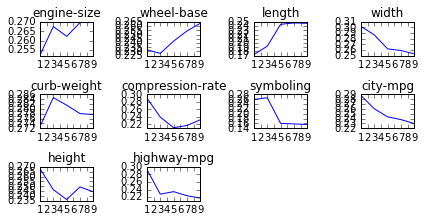

In [9]:
# this plots the relationship between RMSE and k clusters
# for each model

%matplotlib inline
import matplotlib.pyplot as plt
hyperparams=[x for x in range(1,10,2)]
fig = plt.figure()
d=1
for i,v in test_k_vary.items():
    ax=fig.add_subplot(4,4,d)
    ax.plot(hyperparams,v)
    ax.set_title(i)
    d=d+1
plt.tight_layout()
plt.show()
    
    



In [10]:
# new function that uses multiple features to predict the 
# target variable
def knn_train_test_multi(df,target_vars,test_vars):
    nums_train=round(df.shape[0]*.75)
    train=df.iloc[0:nums_train]
    test=df.iloc[nums_train:df.shape[0]+1]
    rmse={}
    knn=KNeighborsRegressor()
    knn.fit(train[test_vars],train[[target_vars]])
    labels=knn.predict(test[test_vars])
    mse=mean_squared_error(test[[target_vars]],labels)
    rmse=mse**(1/2)
    return rmse

In [22]:
# combine the three features that individually result in the 
# lowest RMSE into one model 
small_vals=sorted(test_simple, key=test_simple.get)[0:3]
test_multiple_features=knn_train_test_multi(cars_new,'normalized-losses',small_vals)
test_multiple_features

0.1978162627636213

In [23]:
# combine the four features that individually result in the 
# lowest RMSE into one model 
small_vals=sorted(test_simple, key=test_simple.get)[0:4]
test_rmse=knn_train_test_multi(cars_new,'normalized-losses',small_vals)
test_rmse

0.21954472180304627

In [24]:
# combine the five features that individually result in the 
# lowest RMSE into one model 
small_vals=sorted(test_simple, key=test_simple.get)[0:5]
test_rmse=knn_train_test_multi(cars_new,'normalized-losses',small_vals)
test_rmse

0.21821553642982144

In [14]:
# new function that accepts multiple features and varies
# the cluster numbers 
def knn_train_test_k_params_multi(df,target_vars,test_vars):
    hyperparams= [x for x in range(1,26)]
    nums_train=round(df.shape[0]*.75)
    train=df.iloc[0:nums_train]
    test=df.iloc[nums_train:df.shape[0]+1]
    rmse_all={}
    hold_rmse=[]
    for i in hyperparams:
        knn=KNeighborsRegressor(n_neighbors=i,algorithm='brute')
        knn.fit(train[test_vars],train[[target_vars]])
        labels=knn.predict(test[test_vars])
        mse=mean_squared_error(test[[target_vars]],labels)
        rmse=mse**(1/2)
        hold_rmse.append(rmse)
    rmse_all=hold_rmse
    return rmse_all

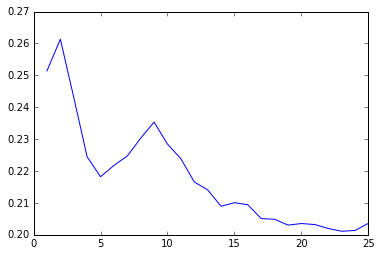

In [51]:
# combine the five features that individually result in the 
# lowest RMSE into one model and vary cluster size
small_vals=sorted(test_simple, key=test_simple.get)[0:5]
test_rmse=knn_train_test_k_params_multi(cars_new,'normalized-losses',small_vals)
hyperparams= [x for x in range(1,26)]
plt.plot(hyperparams,test_rmse)
# find hyperparam associated with lowest rmse value
min_rmse_one=min(test_rmse)
place_min=test_rmse.index(min(test_rmse))
hyperparam_select_one=hyperparams[place_min]


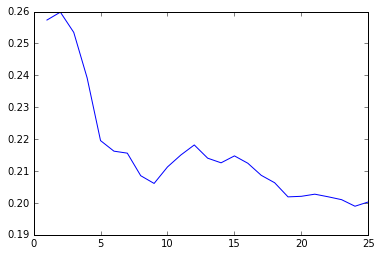

In [52]:
# combine the four features that individually result in the 
# lowest RMSE into one model and vary cluster size
small_vals=sorted(test_simple, key=test_simple.get)[0:4]
test_rmse=knn_train_test_k_params_multi(cars_new,'normalized-losses',small_vals)
hyperparams= [x for x in range(1,26)]
plt.plot(hyperparams,test_rmse)
# find hyperparam associated with lowest rmse value
min_rmse_two=min(test_rmse)
place_min=test_rmse.index(min(test_rmse))
hyperparam_select_two=hyperparams[place_min]


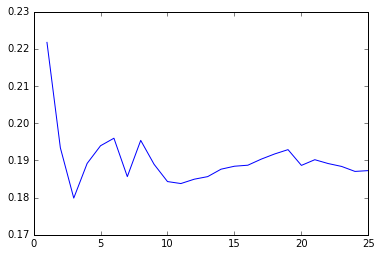

In [53]:
# combine the three features that individually result in the 
# lowest RMSE into one model and vary cluster size
small_vals=sorted(test_simple, key=test_simple.get)[0:3]
test_rmse=knn_train_test_k_params_multi(cars_new,'normalized-losses',small_vals)
hyperparams= [x for x in range(1,26)]
plt.plot(hyperparams,test_rmse)
# find hyperparam associated with lowest rmse value
min_rmse_three=min(test_rmse)
place_min=test_rmse.index(min(test_rmse))
hyperparam_select_three=hyperparams[place_min]


In [56]:
# find smallest rmse from models with different features
models_compare=[min_rmse_one,min_rmse_two,min_rmse_three]
hyperparams_compare=[hyperparam_select_one,hyperparam_select_two,hyperparam_select_three]
lowest_rmse=models_compare.index(min(min_rmse_one,min_rmse_two,min_rmse_three))
hyperparam_select=hyperparams_compare[lowest_rmse]
print(lowest_rmse,hyperparam_select)

2 3


From this analysis it appears that using 3 clusters in the third model, which used the features symboling, compression-rate and highway-mpg, results in the lowest RMSE when predicting normalized losses